In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.datasets import load_diabetes

In [8]:
dataset = load_diabetes()
x, t = dataset.data, dataset.target
columns = dataset.feature_names

In [9]:
#入力変数
type(x), x.shape

(numpy.ndarray, (442, 10))

In [10]:
#目的変数
type(t), t.shape

(numpy.ndarray, (442,))

In [11]:
columns

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [12]:
df = pd.DataFrame(x, columns=columns)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [13]:
df['Target'] = t
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


transform into np array

In [14]:
#to nd array
x = df.drop(labels=['Target'], axis=1).values
t = df['Target'].values

学習データセットと練習データセットに分ける

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

step1: モデルの定義

In [17]:
#線形
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()
#モデルの学習
model.fit(x_train, t_train)
#モデルの検証

LinearRegression()

In [19]:
model.coef_

array([ -52.46478548, -193.50733393,  579.49108514,  272.453666  ,
       -504.64830389,  241.62372969,  -69.76596029,   86.61313961,
        721.92083806,   26.78067442])

<BarContainer object of 10 artists>

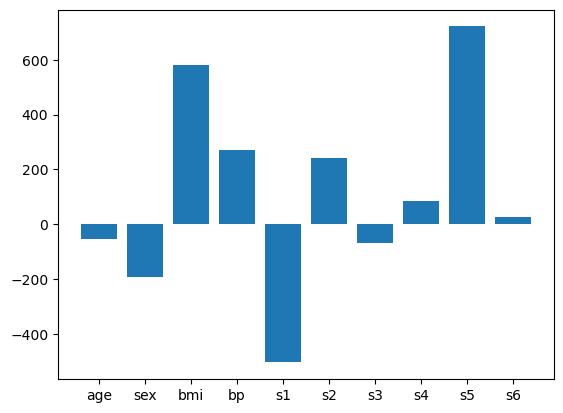

In [20]:
plt.Figure(figsize=(10, 7))
plt.bar(x=columns, height=model.coef_)

In [21]:
#biais
model.intercept_

153.71901624380382

In [22]:
print(f'train score: {model.score(x_train, t_train)}' )
print(f'test score: {model.score(x_train, t_train)}')

train score: 0.5539378915448931
test score: 0.5539378915448931


In [23]:
#予測値
y=model.predict(x_test)
print(f'予測値 {y[0]}')
print(f'目標値 {t_test[0]}')

予測値 239.67646225683944
目標値 321.0


相関関係　多重共線性

In [24]:
df = pd.read_csv("regression_pls.csv")
df.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,...,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,...,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,...,0,0,0,0,0,0,0,0,0,0
3,1.15,71.123,62.051,71.073499,30,0,-0.004845,-0.316731,0.316731,0.004845,...,0,0,0,0,0,0,0,0,0,0
4,1.12,76.055,72.023,76.027277,30,0,0.335391,-0.349891,0.349891,0.335391,...,0,0,0,0,0,0,0,0,0,1


In [25]:
df.shape

(1290, 197)

In [26]:
t = df['Target'].values
x = df.drop("Target",axis=1).values
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [27]:
model = LinearRegression()
model.fit(x_train, t_train)

LinearRegression()

In [28]:
print(f'train score: {model.score(x_train, t_train)}' )
print(f'test score: {model.score(x_test, t_test)}')

train score: 0.936547496460966
test score: -0.007043214703929435


In [29]:
#相関関係
df.corr()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
Target,1.000000,-0.642326,-0.648078,-0.640489,-0.524453,NaN,0.111829,-0.360696,0.357026,0.113189,...,-0.032287,-0.015204,0.019244,-0.047169,NaN,0.007788,NaN,0.002448,-0.113820,0.043600
x1,-0.642326,1.000000,0.997571,0.999978,0.908895,NaN,0.322508,-0.117193,0.134074,0.298204,...,0.051291,0.186110,0.027947,-0.002219,NaN,0.001304,NaN,-0.015226,-0.038657,0.027857
x2,-0.648078,0.997571,1.000000,0.997252,0.883891,NaN,0.322631,-0.097297,0.115794,0.294947,...,0.047416,0.191792,0.029659,-0.007914,NaN,0.005912,NaN,-0.015106,-0.062823,0.027773
x3,-0.640489,0.999978,0.997252,1.000000,0.910855,NaN,0.324352,-0.120477,0.137237,0.300415,...,0.051542,0.186772,0.028046,-0.002001,NaN,0.001447,NaN,-0.015093,-0.038138,0.028359
x4,-0.524453,0.908895,0.883891,0.910855,1.000000,NaN,0.385792,-0.284647,0.293981,0.382603,...,0.044125,0.174983,0.022996,0.018780,NaN,-0.010834,NaN,-0.016378,0.027813,0.055553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x192,0.007788,0.001304,0.005912,0.001447,-0.010834,NaN,0.024306,-0.015943,0.014061,0.025697,...,-0.012022,0.067807,-0.005229,-0.007409,NaN,1.000000,NaN,-0.006191,-0.019703,0.023996
x193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x194,0.002448,-0.015226,-0.015106,-0.015093,-0.016378,NaN,-0.041735,0.036258,-0.038957,-0.042337,...,-0.010594,-0.014830,-0.004608,-0.006529,NaN,-0.006191,NaN,1.000000,-0.017362,-0.015667
x195,-0.113820,-0.038657,-0.062823,-0.038138,0.027813,NaN,0.009401,-0.077525,0.070936,0.019969,...,-0.009401,-0.034774,-0.014663,0.057135,NaN,-0.019703,NaN,-0.017362,1.000000,-0.040662


<Axes: >

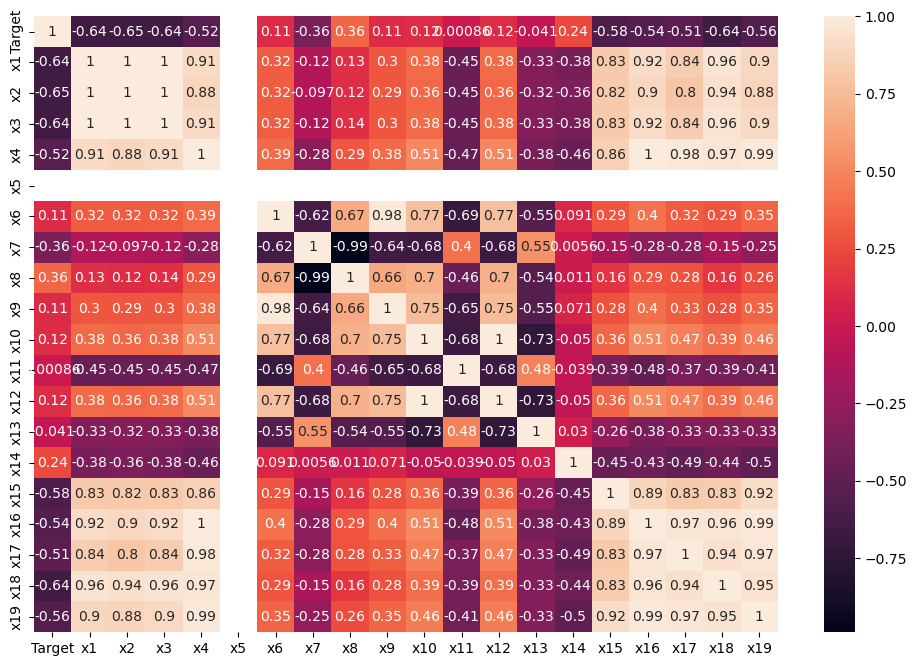

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().iloc[:20,:20], annot=True)

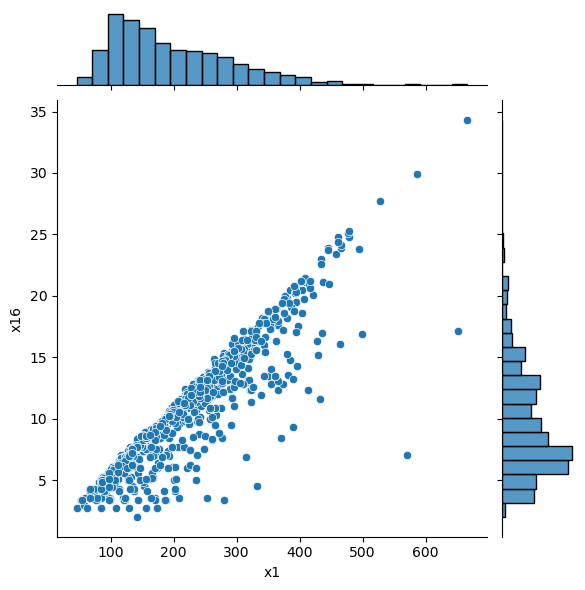

In [31]:
sns.jointplot(x='x1', y='x16', data=df)

相関件数が高いから外す

In [32]:
from sklearn.cross_decomposition import PLSRegression

In [33]:
pls = PLSRegression(n_components=7)
pls.fit(x_train, t_train)
print(f'train score: {pls.score(x_train, t_train)}' )
print(f'test score: {pls.score(x_test, t_test)}')

train score: 0.906376310202351
test score: 0.7387281471807321
